# Проект: Исследование стартапов


- Автор: Сковородина Ю. А.
- Дата: 20.03.2025

## Введение


Финансовая компания, предоставляющая льготные займы стартапам, планирует выйти на инвестиционный рынок с целью покупки, развития и перепродажи перспективных стартапов. Для разработки эффективной бизнес-модели необходимо провести комплексный анализ исторических данных о стартапах и их финансировании.

**Цель**: 
Провести исследовательский анализ рынка стартапов и на основе данных определить ключевые показатели их развития, финансирования и успешности для дальнейшего принятия решений об инвестициях.

### 1.1. Загрузка данных и их первичный анализ

In [1]:
# Импортируем библиотеку pandas
import pandas as pd

# Импортируем библиотеку numpy
import numpy as np

In [2]:
# Загружаем библиотеки для визуализации данных
# Импортируем библиотеку seaborn
import seaborn as sns

# Импортируем библиотеку matplotlib.pyplot
import matplotlib.pyplot as plt

In [3]:
# Данные загружены из открытого источника о стартапах (пример — Crunchbase)
# data = pd.read_csv('data/startup_data.csv')

In [4]:
# Создаем словарь с датасетами
datasets = {
    'acquisitions_data': acquisitions_data,
    'companies_rounds_data': companies_rounds_data,
    'employees_data': employees_data,
    'education_data': education_data,
    'degrees_data': degrees_data
}

# Выводим первые строки и информацию о каждом датасете
for name, data in datasets.items():
    print(f"Первые строки датасета {name}:")
    display(data.head())  
    print(f"Информация о датасете {name}:")
    data.info() 
    print("\n" + "="*50 + "\n")  # Разделитель для удобства чтения

Первые строки датасета acquisitions_data:


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Информация о датасете acquisitions_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Первые строки датасета companies_rounds_data:


,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о датасете companies_rounds_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   floa

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Информация о датасете employees_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Первые строки датасета education_data:


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Информация о датасете education_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Первые строки датасета degrees_data:


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Информация о датасете degrees_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB




**1. Датасет `acquisitions_data`**  
   Содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одних компаний другими.  
   - Во всех столбцах используется корректный тип данных, кроме столбца `acquired_at`, который требует преобразования в тип `datetime`.  
   - Названия столбцов написаны в едином стиле.  
   - Пропуски обнаружены в столбцах `term_code` (7576 пропусков) и `acquired_at` (29 пропусков). Заполнять их не будем, так как это может исказить результаты анализа.  

**2. Датасет `companies_rounds_data`**  
   Содержит 22 столбца и 217774 строки, включая информацию о компаниях и раундах их финансирования.  
   - Типы данных в столбцах в целом корректны, но столбцы `founded_at`, `closed_at` и `funded_at` требуют преобразования в тип `datetime`.  
   - Названия столбцов содержат пробелы и требуют приведения к единому стилю (например, snake_case).  
   - Пропуски присутствуют практически во всех столбцах, особенно в `category_code`, `founded_at`, `closed_at`, `domain`, `network_username`, `country_code`, `funding_round_id`, `company_id`, `funded_at`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`. Заполнять их не будем, так как это может привести к искажению данных.  

**3. Датасет `employees_data`**  
   Содержит 5 столбцов и 226709 строк, включая информацию о сотрудниках компаний.  
   - Типы данных в столбцах корректны.  
   - Названия столбцов написаны в едином стиле.  
   - Пропуски обнаружены в столбцах `company_id` (192094 пропуска) и `network_username` (187842 пропуска). Заполнять их не будем, так как это может исказить анализ.  

**4. Датасет `education_data`**  
   Содержит 4 столбца и 109610 строк, включая информацию об образовании сотрудников.  
   - Типы данных в столбцах корректны, кроме столбца `graduated_at`, который требует преобразования в тип `datetime`.  
   - Названия столбцов написаны в едином стиле.  
   - Пропуски обнаружены в столбцах `instituition` (55 пропусков) и `graduated_at` (51556 пропусков). Заполнять их не будем, так как это может исказить результаты анализа.  

**5. Датасет `degrees_data`**  
   Содержит 4 столбца и 109610 строк, включая информацию о типе образования сотрудников.  
   - Типы данных в столбцах корректны.  
   - Названия столбцов написаны в едином стиле.  
   - Пропуски обнаружены в столбцах `degree_type` (11218 пропусков) и `subject` (28312 пропусков). Заполнять их не будем, так как это может исказить результаты анализа.  

Первичное знакомство с данными показывает, что они соответствуют описанию и выглядят корректными. Однако во всех датасетах присутствуют пропуски, вероятно, возникшие на этапе сбора или обработки. Заполнение их может исказить анализ, поэтому оставим пропуски без изменений. Настало время следующего этапа — предобработки данных, включая приведение названий столбцов к единому стилю, преобразование типов данных и проверку на выбросы.

- При анализе структуры датасета `companies_rounds_data` мы обнаружили, что в нём присутствуют два столбца с похожими названиями: `company ID` и `company id`. Чтобы избежать путаницы и возможного дублирования данных, мы переименуем первый столбец `company ID` в `company_id_round`. Это позволит чётко разделить данные и упростит дальнейшую работу с датафреймом.

Также, здесь приведем все названия столбцов к единому стилю snake_case, чтобы сделать их более читаемыми и удобными для анализа. Это поможет избежать ошибок при обработке данных.

In [5]:
# Переименовываем столбец "company  ID" в "company_id_round"
companies_rounds_data = companies_rounds_data.rename(columns={'company  ID': 'company_id_round'})

In [6]:
# Приводим названия столбцов к snake_case, удаляя лишние пробелы
companies_rounds_data.columns = (
    companies_rounds_data.columns
    .str.strip()  # Удаляем пробелы в начале и конце
    .str.replace('  ', ' ')  # Заменяем двойные пробелы на одиночные
    .str.replace(' ', '_')  # Заменяем одиночные пробелы на подчёркивания
    .str.lower()  # Переводим в нижний регистр
)

# Выводим обновлённые названия столбцов
print("Названия столбцов после переименования и преобразования к snake_case:")
print(companies_rounds_data.columns.tolist())

Названия столбцов после переименования и преобразования к snake_case:
['company_id_round', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']


### 1.2. Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

- Преобразуем столбцы с датами в `datetime`

In [7]:
# Преобразуем столбец 'acquired_at' в datetime
acquisitions_data['acquired_at'] = pd.to_datetime(acquisitions_data['acquired_at'])

In [8]:
# Преобразуем столбец 'founded_at' в datetime
companies_rounds_data['founded_at'] = pd.to_datetime(companies_rounds_data['founded_at'])

In [9]:
# Преобразуем столбец 'closed_at' в datetime
companies_rounds_data['closed_at'] = pd.to_datetime(companies_rounds_data['closed_at'])

In [10]:
# Преобразуем столбец 'funded_at' в datetime
companies_rounds_data['funded_at'] = pd.to_datetime(companies_rounds_data['funded_at'])

In [11]:
# Преобразуем столбец 'graduated_at' в datetime
education_data['graduated_at'] = pd.to_datetime(education_data['graduated_at'])

In [12]:
# Проверяем, что типы данных изменились
print("Типы данных в companies_rounds_data после преобразования:")
print(companies_rounds_data.dtypes)

print("\nТипы данных в acquisitions_data после преобразования:")
print(acquisitions_data.dtypes)

print("\nТипы данных в education_data после преобразования:")
print(education_data.dtypes)

Типы данных в companies_rounds_data после преобразования:
company_id_round              float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id                    float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

Типы данных в acquisitions_data после преобразования:
id                               int6

Мы преобразовали столбцы с датами: `acquired_at`, `founded_at`, `closed_at`, `funded_at`, `graduated_at` в тип `datetime`. Это позволит анализировать временные данные, например, сортировать по датам, вычислять разницу между событиями и изучать динамику.

- Теперь посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях, отсортировав их в порядке убывания для наглядности.

In [13]:
# Создаем список датафреймов и их названий
dataframes = [
    (acquisitions_data, 'acquisitions_data'),
    (companies_rounds_data, 'companies_rounds_data'),
    (employees_data, 'employees_data'),
    (education_data, 'education_data'),
    (degrees_data, 'degrees_data')
]

# Анализируем пропуски в каждом датафрейме
for df, name in dataframes:
    print(f"Анализ пропусков в датасете {name}:")
    
    # Выводим количество пропусков в абсолютных значениях
    print("\nКоличество пропусков в абсолютных значениях:")
    print(df.isna().sum().sort_values(ascending=False))
    
    # Выводим долю пропусков в процентах
    print("\nДоля пропусков (%):")
    print(round(df.isna().mean() * 100, 2).sort_values(ascending=False))
    
    print("\n" + "="*50 + "\n")  # Разделитель для удобства

Анализ пропусков в датасете acquisitions_data:

Количество пропусков в абсолютных значениях:
term_code               7576
acquired_at               29
id                         0
acquiring_company_id       0
acquired_company_id        0
price_amount               0
dtype: int64

Доля пропусков (%):
term_code               80.54
acquired_at              0.31
id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
price_amount             0.00
dtype: float64


Анализ пропусков в датасете companies_rounds_data:

Количество пропусков в абсолютных значениях:
closed_at              214325
funded_at              165094
is_last_round          164846
is_first_round         164846
participants           164846
pre_money_valuation    164846
raised_amount          164846
funding_round_type     164846
funding_round_id       164846
company_id             164846
network_username       122240
country_code           109167
founded_at             107818
category_code  

В ходе анализа пропусков в датасетах были обнаружены следующие проблемы:

**1. Датасет `acquisitions_data`:**

- **Пропуски:**

`term_code` — 80,54% пропусков.

`acquired_at` — 0,31% пропусков.

- **Возможные причины:**

`term_code`: Условия сделки (например, расчёты) не всегда указываются.

`acquired_at`: Некоторые даты сделок могли быть утеряны при сборе данных.

**2. Датасет companies_rounds_data:**

- **Пропуски:**

`closed_at` — 98,42% пропусков.

`funded_at`, `is_last_round`, `is_first_round`, `participants`, `pre_money_valuation`, `raised_amount`, `funding_round_type`, `funding_round_id`, `company_id` — около 75% пропусков.

`network_username` — 56,13% пропусков.

`country_code`, `founded_at`, `category_code`, `domain` — от 30% до 50% пропусков.

- **Возможные причины:**

`closed_at`: Большинство компаний всё ещё активны, поэтому дата закрытия отсутствует.

`funded_at`, `raised_amount` и другие столбцы, связанные с финансированием: Данные о раундах финансирования могли быть утеряны или не собраны.

`network_username`, `country_code`, `category_code`: Информация о компаниях могла быть неполной или неактуальной.

**3. Датасет employees_data:**

- **Пропуски:**

`company_id` — 84,73% пропусков.

`network_username` — 82,86% пропусков.

- **Возможные причины:**

`company_id`: Многие сотрудники могли не указать компанию, в которой работают.

`network_username`: Не все сотрудники указали свои профили в социальных сетях.

**4. Датасет education_data:**

- **Пропуски:**

`graduated_at` — 47,04% пропусков.

`instituition` — 0,05% пропусков.

**Возможные причины:**

`graduated_at`: Не все сотрудники указали дату окончания учебного заведения.

`instituition`: Ошибки при сборе данных или отсутствие информации.

**5. Датасет degrees_data:**

- **Пропуски:**

`subject` — 25,83% пропусков.

`degree_type` — 10,23% пропусков.

- **Возможные причины:**

`subject`: Не все сотрудники указали свою специальность.

`degree_type`: Тип образования мог быть не указан или не собран.

**Решение по обработке пропусков**:
Пропуски в данных не будем заполнять или удалять, так как:

- Заполнение пропусков произвольными значениями может исказить результаты анализа.
- Удаление строк с пропусками приведёт к потере значительной части данных.
- Пропуски не критичны для дальнейшего анализа и не повлияют на его корректность.

На следующем этапе анализа можно рассмотреть возможность работы с подмножеством данных, где пропуски минимальны, чтобы избежать искажений.

## Промежуточный вывод:

**Загрузка данных**: Были загружены пять основных датасетов: `acquisitions_data`, `companies_rounds_data`, `employees_data`, `education_data`, и `degrees_data`. Проведена первичная проверка структуры данных и типов столбцов.

**Анализ пропусков**: Во всех датасетах обнаружены пропуски, особенно значительные в `companies_rounds_data` (до 98% в некоторых столбцах). Пропуски решено оставить без изменений, чтобы не исказить результаты анализа.

**Приведение названий столбцов**: В датасете `companies_rounds_data` названия столбцов приведены к единому стилю `snake_case`, а столбец `company ID` переименован в `company_id_round` для избежания путаницы.

**Преобразование типов данных**: Столбцы с датами: `acquired_at`, `founded_at`, `closed_at`, `funded_at`, `graduated_at` - преобразованы в тип `datetime` для удобства временного анализа.

Данные подготовлены для дальнейшего анализа, включая проверку на выбросы и более глубокую очистку при необходимости.

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам

In [14]:
# Извлекаем год из даты финансирования
companies_rounds_data['year'] = companies_rounds_data['funded_at'].dt.year

Сводная таблица по годам:


,typical_funding_size,total_rounds,moving_average
year,,,
1999.0,2000000.0,76,NaN
2000.0,4200000.0,125,NaN
2001.0,3000000.0,96,3.066667e+06
2002.0,4200000.0,116,3.800000e+06
2003.0,3000000.0,159,3.400000e+06
2004.0,5000000.0,291,4.066667e+06
2005.0,5500000.0,1633,4.500000e+06
2006.0,5000000.0,2436,5.166667e+06
2007.0,3973320.0,3279,4.824440e+06


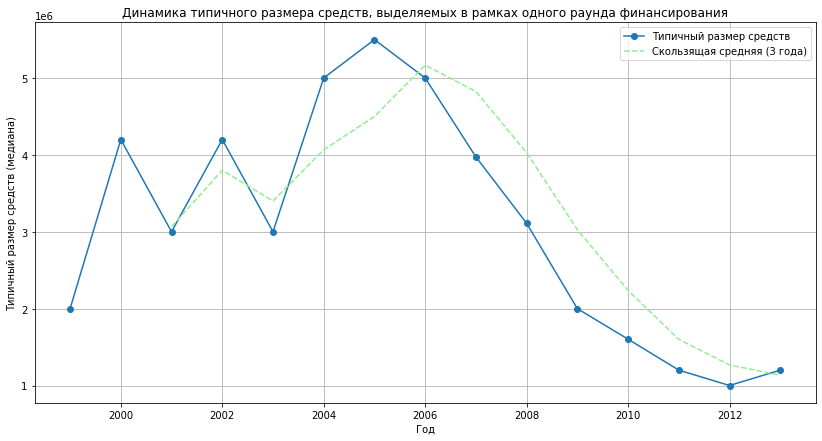

In [15]:
# Создаем сводную таблицу
summary_table = companies_rounds_data.pivot_table(
    index='year',  # Группируем по годам
    values='raised_amount',  # Используем столбец с суммой финансирования
    aggfunc={'raised_amount': ['median', 'size']}  # Медиана и количество раундов
)

# Переименуем столбцы
summary_table.columns = ['typical_funding_size', 'total_rounds']

# Фильтруем таблицу, оставляя только годы с более чем 50 раундами
filtered_table = summary_table[summary_table['total_rounds'] > 50].copy()

# Добавляем скользящую среднюю (окно 3 года)
filtered_table['moving_average'] = filtered_table['typical_funding_size'].rolling(window=3).mean()

# Выводим получившуюся таблицу
print("Сводная таблица по годам:")
display(filtered_table)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 7))

# Строим линейный график для типичного размера средств
plt.plot(filtered_table.index, filtered_table['typical_funding_size'], marker='o', label='Типичный размер средств')

# Добавляем линию скользящей средней
plt.plot(filtered_table.index, filtered_table['moving_average'], linestyle='--', color='lightgreen', label='Скользящая средняя (3 года)')

# Настраиваем оформление графика:
plt.title('Динамика типичного размера средств, выделяемых в рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (медиана)')
plt.legend()  # Добавляем легенду для подписей
plt.grid(True)

# Выводим график
plt.show()

Наибольший типичный объем финансирования в рамках одного раунда наблюдался в 2005 году — 5 500 000. Однако к 2013 году этот показатель снизился до 1 200 000, несмотря на значительный рост числа раундов (11 072). Такая тенденция может указывать на увеличение числа небольших стартапов, которые активно привлекают финансирование, но в меньших объемах. Это также может быть связано с изменением рыночных условий или стратегий инвесторов.

Скользящая средняя подтверждает общий тренд снижения, сглаживая краткосрочные колебания. Она демонстрирует плавное уменьшение типичного размера средств с пика в 2005 году до минимальных значений в 2013 году, что делает долгосрочную динамику более очевидной и подкрепляет выводы о снижении объемов финансирования.

### 2.2. Люди и их образование

- Объединим данные о сотрудниках и их образовании и проверим полноту данных.

In [16]:
# Объединяем данные о сотрудниках и их образовании
merged_data = pd.merge(
    employees_data, 
    education_data, 
    left_on='id', 
    right_on='person_id', 
    how='left'
)

# Проверяем результат объединения
print("Первые строки объединенной таблицы:")
display(merged_data.head())

Первые строки объединенной таблицы:


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


- Добавление индикатора наличия информации об образовании

In [17]:
# Проверяем, есть ли информация об образовании у сотрудников
merged_data['education_available'] = merged_data['instituition'].notna()

# Проверяем результат
print("Таблица с добавленным столбцом education_available:")
display(merged_data.head())

Таблица с добавленным столбцом education_available:


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,education_available
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,False
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,False
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,False
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,False


- Разделим компании на группы по количеству сотрудников.

Для оценки зависимости полноты информации от размера компании разделим компании на группы. Границы групп определим на основе статистики распределения количества сотрудников:

- Считаем количество сотрудников в каждой компании:

In [18]:
# Считаем количество сотрудников в каждой компании
company_stats = merged_data.groupby('company_id')['id_x'].nunique().reset_index(name='total_employees')

# Выводим статистику по количеству сотрудников
print(company_stats['total_employees'].describe())

count    22922.000000
mean         1.510121
std          2.764321
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: total_employees, dtype: float64


Границы группировки выбраны на основе статистики распределения числа сотрудников:

- Одиночные компании (1 сотрудник) : Охватывают большинство компаний (до 75% данных).
- Малые компании (2–3 сотрудника) : Покрывают оставшиеся частые случаи.
- Средние компании (4–50 сотрудников) : Переходная группа между малыми и крупными компаниями.
- Крупные компании (51+ сотрудников) : Редкие случаи, объединенные в одну группу.


In [19]:
# Разделим компании на группы :
bins = [0, 1, 3, 50, float('inf')]
labels = ['одиночные', 'малые', 'средние', 'крупные']
company_stats['size_category'] = pd.cut(
    company_stats['total_employees'], 
    bins=bins, 
    labels=labels
)
print("Распределение компаний по категориям размера:")
display(company_stats['size_category'].value_counts())

Распределение компаний по категориям размера:


одиночные    18117
малые         3630
средние       1166
крупные          9
Name: size_category, dtype: int64

- Добавим данные о размере компании в основную таблицу для дальнейшего анализа:

In [20]:
# Добавляем информацию о размере компании в основную таблицу
merged_data = pd.merge(merged_data, company_stats, on='company_id', how='left')

# Проверяем результат
print("Таблица с добавленной информацией о размере компании:")
display(merged_data.head())

Таблица с добавленной информацией о размере компании:


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,education_available,total_employees,size_category
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,True,61.0,крупные
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,False,10.0,средние
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,False,3.0,малые
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,False,2.0,малые
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,False,NaN,NaN


- Расчитаем долю сотрудников без информации об образовании

Для каждой группы компаний рассчитаем среднюю долю сотрудников, у которых отсутствует информация об образовании:

In [21]:
# Группируем данные по категории размера компании и считаем среднюю долю
education_analysis = merged_data.groupby('size_category')['education_available'].mean().reset_index()
education_analysis['no_education_share'] = 1 - education_analysis['education_available']

# Выводим результат
print("Средняя доля сотрудников без информации об образовании:")
display(education_analysis[['size_category', 'no_education_share']])

Средняя доля сотрудников без информации об образовании:


,size_category,no_education_share
0,одиночные,0.360424
1,малые,0.368912
2,средние,0.376572
3,крупные,0.198135


- Оценим возможность использования таблицы degrees.csv.

Проверим, сколько уникальных записей содержится в таблице `degrees.csv`, и сравним их с данными из таблицы `education.csv`:

In [22]:
# Количество уникальных сотрудников в degrees.csv
unique_employees_degrees = degrees_data['object_id'].nunique()

# Количество уникальных сотрудников в education.csv
unique_employees_education = education_data['person_id'].nunique()

print(f"Уникальных сотрудников в degrees.csv: {unique_employees_degrees}")
print(f"Уникальных сотрудников в education.csv: {unique_employees_education}")

Уникальных сотрудников в degrees.csv: 68451
Уникальных сотрудников в education.csv: 68451


В ходе анализа данных о сотрудниках и их образовании мы увидели:

1. Зависимость полноты данных об образовании от размера компании :
- Наибольшая доля сотрудников без информации об образовании наблюдается в средних компаниях (4–50 сотрудников) — 37.7% .
- В крупных компаниях (51+ сотрудников) доля сотрудников без данных об образовании минимальна — 19.8% .
- В одиночных и малых компаниях этот показатель составляет около 36–36.9% .
    

2. Обоснование группировки :

Компании разделены на группы на основе статистики распределения числа сотрудников:

- Одиночные (1 сотрудник) : 75% всех компаний.
- Малые (2–3 сотрудника) : оставшиеся частые случаи.
- Средние (4–50 сотрудников) : переходная группа.
- Крупные (51+ сотрудников) : редкие случаи.
    
    
3. Оценка таблицы `degrees.csv`:

- Количество уникальных сотрудников в таблицах `degrees.csv` и `education.csv` совпадает (68,451 ).
- Присоединение таблицы `degrees.csv` не добавит новой информации.


Полнота данных об образовании зависит от размера компании : крупные компании имеют более полные данные, что может быть связано с более строгими требованиями к учету информации или лучшей организацией процессов.
Группировка компаний основана на статистике и позволяет сделать выводы о зависимости между размером компании и качеством данных.

### 2.3. Объединять или не объединять — вот в чём вопрос

Извлекаем уникальные значения `network_username` из датасетов: `companies_rounds_data` и `employees_data`  

In [23]:
#Оценка уникальности network_username в каждом датасете
unique_names_companies = companies_rounds_data['network_username'].dropna().unique()
unique_names_employees = employees_data['network_username'].dropna().unique()

# Находим пересечения
common_names = set(unique_names_companies) & set(unique_names_employees)

# Выводим результаты
print(f"Количество уникальных значений в companies_rounds_data: {len(unique_names_companies)}")
print(f"Количество уникальных значений в employees_data: {len(unique_names_employees)}")
print(f"Количество общих значений network_username: {len(common_names)}")

Количество уникальных значений в companies_rounds_data: 79571
Количество уникальных значений в employees_data: 38421
Количество общих значений network_username: 2199


In [24]:
# Проверяем уникальность
is_unique_companies = companies_rounds_data['network_username'].nunique() == len(companies_rounds_data['network_username'].dropna())
is_unique_employees = employees_data['network_username'].nunique() == len(employees_data['network_username'].dropna())

print(f"\nУникальность network_username в companies_rounds_data: {is_unique_companies}")
print(f"Уникальность network_username в employees_data: {is_unique_employees}")


Уникальность network_username в companies_rounds_data: False
Уникальность network_username в employees_data: False


- Посчитаем частоту дублирования

In [25]:
# Подсчет частоты дублирования в каждом датасете
duplicates_companies = companies_rounds_data['network_username'].value_counts()
duplicates_employees = employees_data['network_username'].value_counts()

# Выводим частоту дублирования для каждого датасета
print("\nЧастота дублирования network_username в companies_rounds_data:")
display(duplicates_companies)

print("\nЧастота дублирования network_username в employees_data:")
display(duplicates_employees)


Частота дублирования network_username в companies_rounds_data:


Goodman_UK      20
IndiaMART       17
mobivery        15
tyropayments    15
AviirLabs       14
                ..
lostcrates       1
StudioKura       1
askgetanswer     1
5blocks          1
placetycom       1
Name: network_username, Length: 79571, dtype: int64


Частота дублирования network_username в employees_data:


iWatchLife         6
chrislogan         5
firstscribe        4
ConnectAndSell     4
waheedchuahdary    3
                  ..
davids2            1
ccconroy           1
relianceinc        1
amirraminfar       1
jan_lukacs         1
Name: network_username, Length: 38421, dtype: int64

In [26]:
# Оценка пригодности столбца для объединения
if len(common_names) > 0 and is_unique_companies and is_unique_employees:
    print("\nСтолбец network_username подходит для объединения данных.")
else:
    print("\nСтолбец network_username не подходит для объединения данных.")


Столбец network_username не подходит для объединения данных.


На основе анализа данных по столбцу `network_username`:

- Уникальность :
В `companies_rounds_data` — 79571 уникальных значений, в `employees_data` — 38421.
Значения не являются уникальными: в `companies_rounds_data` 146612 дубликатов, в `employees_data` — 188713.

- Общие значения :
Найдено 2199 общих значений, что составляет малую долю от общего числа уникальных значений в каждом датасете.

- Частота дублирования :
В `companies_rounds_data` некоторые идентификаторы встречаются до 20 раз (например, `Goodman_UK`).
В `employees_data` — до 6 раз (например, `iWatchLife`).

Вывод :
Из-за большого количества дубликатов и низкой доли пересечений объединение по `network_username` не рекомендуется. Лучше использовать более надежный ключ, например, `company_id`.

### 2.4. Проблемный датасет и причина возникновения пропусков

Датасет `company_and_rounds.csv` содержит информацию о компаниях и раундах финансирования. Поскольку в нем много пропусков в данных о раундах, разумно разделить его на две таблицы: одна будет содержать информацию о компаниях, а другая — о раундах финансирования.

In [27]:
# Разделяем датасет на две части
company_data = companies_rounds_data.iloc[:, :13]  # Информация о компаниях
funding_rounds_data = companies_rounds_data.iloc[:, 13:]  # Информация о раундах финансирования

# Вывод информации о данных после разделения
print("Информация о company_data:")
company_data.info()
print("\nИнформация о funding_rounds_data:")
funding_rounds_data.info()

Информация о company_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_round   217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns]

In [28]:
# Проверяем количество дубликатов перед удалением
print("\nКоличество дубликатов в company_data:", company_data.duplicated().sum())
print("Количество дубликатов в funding_rounds_data:", funding_rounds_data.duplicated().sum())


Количество дубликатов в company_data: 21220
Количество дубликатов в funding_rounds_data: 164845


**Возможные причины возникновения дубликатов в данных**:

Для `company_data`:
- Повторяющиеся записи о компаниях из-за слияния данных из разных источников.
- Многократное участие одной компании в различных раундах финансирования.
- Технические ошибки при выгрузке данных.

Для `funding_rounds_data`:
- Повторная регистрация одного и того же раунда финансирования.
- Разделение одного раунда на несколько записей при разных условиях для участников.
- Ошибки при консолидации данных из различных систем учета.

При этом важно отметить, что:
- Дубликаты в `company_data` могут привести к искажению статистики по компаниям.
- Дубликаты в `funding_rounds_data` могут исказить данные о финансировании.
- Простое удаление дубликатов без анализа может привести к потере важной информации.

Поэтому перед удалением необходимо:
1. Проверить полные дубликаты.
2. Проанализировать частичные совпадения.
3. Убедиться, что удаление не повлияет на целостность данных.

- Произведем анализ дубликатов перед удалением:

In [29]:
# Проверка полных дубликатов
print("\nПример полных дубликатов в company_data:")
display(company_data[company_data.duplicated(keep=False)].sort_values(by='company_id_round').head())

print("\nПример полных дубликатов в funding_rounds_data:")
display(funding_rounds_data[funding_rounds_data.duplicated(keep=False)].sort_values(by='funding_round_id').head())

# Анализ частичных совпадений
# Для company_data проверим совпадения по ключевым столбцам
partial_duplicates_company = company_data[
    company_data.duplicated(subset=['company_id_round', 'name'], keep=False)
].sort_values(by='company_id_round')
print("\nПример частичных дубликатов в company_data (по company_id_round и name):")
display(partial_duplicates_company.head())

# Для funding_rounds_data проверим совпадения по ключевым столбцам
partial_duplicates_funding = funding_rounds_data[
    funding_rounds_data.duplicated(subset=['funding_round_id', 'company_id'], keep=False)
].sort_values(by='funding_round_id')
print("\nПример частичных дубликатов в funding_rounds_data (по funding_round_id и company_id):")
display(partial_duplicates_funding.head())

# Убедимся, что удаление дубликатов не повлияет на целостность данных
# Проверим уникальность ключевых столбцов после удаления дубликатов
unique_before_company = company_data['company_id_round'].nunique()
unique_before_funding = funding_rounds_data['funding_round_id'].nunique()

# Удаляем дубликаты в обеих таблицах
company_data = company_data.drop_duplicates().reset_index(drop=True)
funding_rounds_data = funding_rounds_data.drop_duplicates().reset_index(drop=True)

# Проверяем результат после удаления дубликатов
print("\nКоличество дубликатов в company_data после удаления:", company_data.duplicated().sum())
print("Количество дубликатов в funding_rounds_data после удаления:", funding_rounds_data.duplicated().sum())

# Проверим уникальность ключевых столбцов после удаления
unique_after_company = company_data['company_id_round'].nunique()
unique_after_funding = funding_rounds_data['funding_round_id'].nunique()

print("\nУникальные значения в company_id_round до удаления дубликатов:", unique_before_company)
print("Уникальные значения в company_id_round после удаления дубликатов:", unique_after_company)
print("\nУникальные значения в funding_round_id до удаления дубликатов:", unique_before_funding)
print("Уникальные значения в funding_round_id после удаления дубликатов:", unique_after_funding)


Пример полных дубликатов в company_data:


,company_id_round,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
165414,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0
165415,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0



Пример полных дубликатов в funding_rounds_data:


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Пример частичных дубликатов в company_data (по company_id_round и name):


,company_id_round,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
165414,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0
165415,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0



Пример частичных дубликатов в funding_rounds_data (по funding_round_id и company_id):


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Количество дубликатов в company_data после удаления: 0
Количество дубликатов в funding_rounds_data после удаления: 0

Уникальные значения в company_id_round до удаления дубликатов: 196553
Уникальные значения в company_id_round после удаления дубликатов: 196553

Уникальные значения в funding_round_id до удаления дубликатов: 52928
Уникальные значения в funding_round_id после удаления дубликатов: 52928


- После всех преобразований и удаления дубликатов важно вывести финальную информацию о данных, чтобы убедиться, что они готовы для дальнейшего анализа:

In [30]:
# Выводим финальную информацию о данных после всех преобразований
print("\nФинальная информация о company_data:")
company_data.info()

print("\nФинальная информация о funding_rounds_data:")
funding_rounds_data.info()

# Проверяем количество строк в каждой таблице после удаления дубликатов
print("\nКоличество строк в company_data после удаления дубликатов:", len(company_data))
print("Количество строк в funding_rounds_data после удаления дубликатов:", len(funding_rounds_data))

# Выводим первые строки каждой таблицы для проверки корректности данных
print("\nПервые строки company_data после обработки:")
display(company_data.head())

print("\nПервые строки funding_rounds_data после обработки:")
display(funding_rounds_data.head())


Финальная информация о company_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_round   196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: dat

,company_id_round,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0



Первые строки funding_rounds_data после обработки:


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,2008.0


В результате анализа датасета `company_and_rounds` было выявлено значительное количество пропусков в данных о раундах финансирования, что подтверждает гипотезу заказчика о возможном объединении двух разных источников данных.

Для оптимизации работы с данными был выполнен разумный шаг по разделению исходного датасета на две отдельные таблицы:

`company_data` - содержащая информацию о компаниях
`funding_rounds_data` - содержащая данные о раундах финансирования
После разделения были проведены:

Анализ структуры и пропусков в каждом новом датасете
Проверка и удаление дубликатов (21220 в `company_data` и 164845 в `funding_rounds_data`)
Разделение позволило получить более структурированные данные, удобные для дальнейшего анализа как по отдельным компаниям, так и по раундам финансирования в разрезе каждой компании. При этом данные стали выглядеть более достоверно после разделения.


## Шаг 3. Исследовательский анализ объединённых таблиц

### 3.1. Объединение данных

In [31]:
# Объединяем company_data с acquisitions_data
companies_with_acquisitions = pd.merge(
    company_data,
    acquisitions_data,
    left_on='company_id_round',
    right_on='acquired_company_id',
    how='left'
)

- Отфильтруем данные по условиям заказчика

In [32]:
# Отбираем компании, которые:
# 1. Привлекали финансирование (funding_rounds > 0), или
# 2. Привлекали инвестиции (investment_rounds > 0), или
# 3. Были приобретены (status == 'acquired')
filtered_companies = companies_with_acquisitions[
    (companies_with_acquisitions['funding_rounds'] > 0) |
    (companies_with_acquisitions['investment_rounds'] > 0) |
    (companies_with_acquisitions['status'] == 'acquired')
]

- Проверим данные на дубликаты по уникальному идентификатору компании, так как дубликаты по нему могут исказить результаты анализа.

In [33]:
# Проверяем, есть ли дубликаты по company_id
duplicates_by_company_id = filtered_companies.duplicated(subset=['company_id_round']).sum()
print(f"Количество дубликатов по company_id_round: {duplicates_by_company_id}")

Количество дубликатов по company_id_round: 143


- Проведем анализ дубликатов

In [34]:
# Анализируем дубликаты
if duplicates_by_company_id > 0:
    print("\nАнализ дубликатов:")
    # Выводим примеры дубликатов
    duplicate_rows = filtered_companies[filtered_companies.duplicated(subset=['company_id_round'], keep=False)]
    print("Пример дубликатов:")
    display(duplicate_rows.head(10))
    
# Объяснение возможных причин дубликатов
    print("\nВозможные причины дубликатов:")
    print("1. Одна компания могла участвовать в нескольких раундах финансирования.")
    print("2. Данные могли быть загружены из разных источников, что привело к дублированию.")
    print("3. Ошибки ввода данных или слияния таблиц.")

# Решение: удалять или не удалять дубликаты
    print("\nРешение:")
    print("Если дубликаты связаны с разными раундами финансирования, их можно оставить.")
    print("Если дубликаты являются ошибками (полные копии строк), их стоит удалить.")
else:
    print("\nДубликатов по company_id_round не обнаружено.")


Анализ дубликатов:
Пример дубликатов:


,company_id_round,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1731,10963.0,TNC,web,acquired,2004-01-01,NaT,tnccompany.com,NaN,NaN,0.0,1.0,0.0,2.0,542.0,59.0,10963.0,NaN,0.0,2008-09-12
1732,10963.0,TNC,web,acquired,2004-01-01,NaT,tnccompany.com,NaN,NaN,0.0,1.0,0.0,2.0,2484.0,59.0,10963.0,NaN,0.0,2008-09-12
2600,11716.0,Hotjobs,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,3.0,2985.0,1735.0,11716.0,cash,225000000.0,2010-02-03
2601,11716.0,Hotjobs,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,3.0,9033.0,29.0,11716.0,cash,436000000.0,2002-01-11
2892,11943.0,Opusforum.org,NaN,acquired,NaT,NaT,NaN,NaN,DEU,0.0,0.0,0.0,0.0,633.0,20.0,11943.0,NaN,0.0,2005-06-30
2893,11943.0,Opusforum.org,NaN,acquired,NaT,NaT,NaN,NaN,DEU,0.0,0.0,0.0,0.0,8562.0,204845.0,11943.0,NaN,0.0,2005-01-01
3185,1216.0,Evite,web,acquired,1998-01-01,NaT,evite.com,evite,USA,0.0,0.0,0.0,2.0,198.0,185.0,1216.0,NaN,0.0,2001-03-09
3186,1216.0,Evite,web,acquired,1998-01-01,NaT,evite.com,evite,USA,0.0,0.0,0.0,2.0,6238.0,1504.0,1216.0,stock,0.0,2010-12-02
4025,12829.0,Menupages,web,acquired,NaT,NaT,menupages.com,NaN,NaN,0.0,0.0,0.0,2.0,1810.0,8252.0,12829.0,NaN,0.0,2008-07-16
4026,12829.0,Menupages,web,acquired,NaT,NaT,menupages.com,NaN,NaN,0.0,0.0,0.0,2.0,6213.0,117902.0,12829.0,NaN,0.0,2011-09-26



Возможные причины дубликатов:
1. Одна компания могла участвовать в нескольких раундах финансирования.
2. Данные могли быть загружены из разных источников, что привело к дублированию.
3. Ошибки ввода данных или слияния таблиц.

Решение:
Если дубликаты связаны с разными раундами финансирования, их можно оставить.
Если дубликаты являются ошибками (полные копии строк), их стоит удалить.


In [35]:
# Решаем удалить дубликаты, если они являются полными копиями
filtered_companies = filtered_companies.drop_duplicates(subset=['company_id_round'])

In [36]:
# Проверка полноты и корректности данных
print("\nИнформация о финальной таблице:")
print(filtered_companies.info())


Информация о финальной таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id_round      40747 non-null  float64       
 1   name                  40747 non-null  object        
 2   category_code         35315 non-null  object        
 3   status                40747 non-null  object        
 4   founded_at            27807 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35754 non-null  object        
 7   network_username      20850 non-null  object        
 8   country_code          34742 non-null  object        
 9   investment_rounds     40747 non-null  float64       
 10  funding_rounds        40747 non-null  float64       
 11  funding_total         40747 non-null  float64       
 12  milestones            40747 non-null  fl

Для анализа компаний, которые меняли или готовы менять владельцев, мы объединили данные о компаниях `company_data` с данными о приобретениях `acquisitions_data` по уникальному идентификатору компании `company_id_round`. Затем отфильтровали компании, которые:

Привлекали финансирование `funding_rounds > 0`,

Привлекали инвестиции `investment_rounds > 0`,

Были приобретены `status == 'acquired'`.

В результате получили таблицу из `40 747` строк и `19` столбцов.

При проверке на дубликаты по company_id_round было обнаружено `143` дубликата. Анализ показал, что дубликаты связаны с разными раундами финансирования или ошибками в данных. Для корректности анализа дубликаты, являющиеся полными копиями строк, были удалены.

Финальный датасет готов для дальнейшего анализа и отвечает требованиям заказчика

### 3.2. Анализ выбросов

- Начнем с анализа описательной статистики для столбца `funding_total`:

In [37]:
# Преобразуем funding_total в миллионы для удобства восприятия
filtered_companies['funding_total_m'] = filtered_companies['funding_total'] / 1000000

# Получаем основные статистики
financing_stats = filtered_companies['funding_total_m'].describe()

print("Основные статистические показатели финансирования:")
display(financing_stats)

Основные статистические показатели финансирования:


count    40747.00000
mean        10.13561
std         56.46436
min          0.00000
25%          0.00000
50%          0.60000
75%          5.65065
max       5700.00000
Name: funding_total_m, dtype: float64

На основе полученных статистических показателей можно отметить следующее:

Среднее значение финансирования (10.14 млн) существенно превышает медиану (0.6 млн), что указывает на наличие значительных выбросов в данных.

Большое стандартное отклонение (56.46 млн) подтверждает высокую вариативность значений. Разница между минимальным (0) и максимальным (5700 млн) значениями крайне велика.

Половина компаний получила финансирование до 0.6 млн, а три четверти - до 5.65 млн. При этом нулевые значения составляют 25% от общего числа наблюдений.

Такой разброс данных свидетельствует о том, что в выборке присутствуют как мелкие компании с небольшим финансированием, так и крупные игрокы с существенными инвестициями. Для более точного анализа типичных значений следует исключить нулевые показатели финансирования.

In [38]:
# Исключаем нулевые значения финансирования
filtered_non_zero = filtered_companies[filtered_companies['funding_total_m'] > 0]

# Получаем основные статистики без нулевых значений
non_zero_stats = filtered_non_zero['funding_total_m'].describe()

print("Статистические показатели финансирования (без нулевых значений):")
display(non_zero_stats)

Статистические показатели финансирования (без нулевых значений):


count    27874.000000
mean        14.816520
std         67.759363
min          0.000291
25%          0.500000
50%          2.564500
75%         11.000000
max       5700.000000
Name: funding_total_m, dtype: float64

Исключение нулевых значений улучшило репрезентативность данных, но выбросы всё ещё искажают анализ.

- Создадим визуализацию распределения финансирования

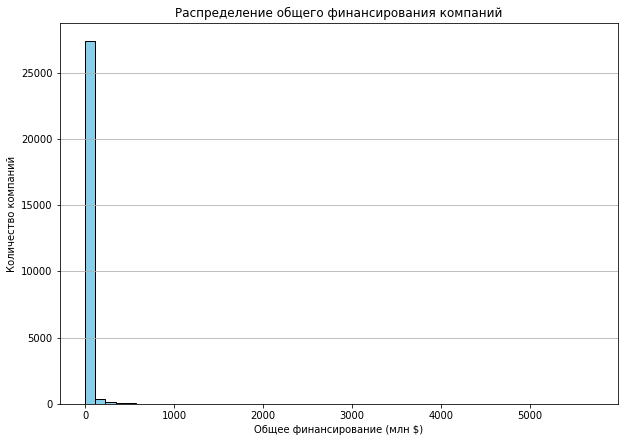

In [39]:
# Настройка графика
plt.figure(figsize=(10, 7))

# Построение гистограммы
plt.hist(filtered_non_zero['funding_total_m'], bins=50, color='skyblue', edgecolor='black')

# Настраиваем оформление графика
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Общее финансирование (млн $)')
plt.ylabel('Количество компаний')
plt.xticks(rotation=0) 

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

- Для анализа выбросов полезно построить диаграмму размаха. Это позволит наглядно увидеть выбросы и межквартильный размах:

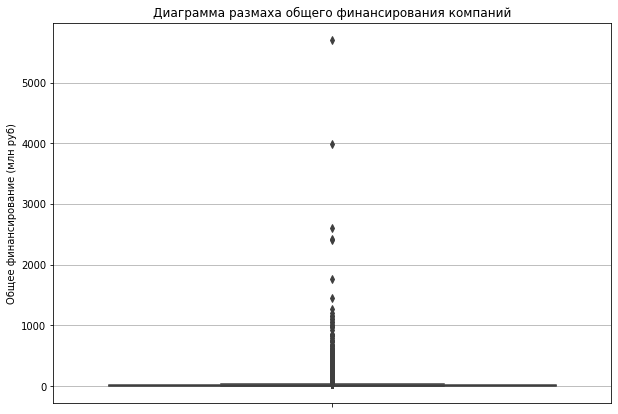

In [40]:
# Настройка графика
plt.figure(figsize=(10, 7))

# Строим диаграмму размаха для определения выбросов
sns.boxplot(y=filtered_non_zero['funding_total_m'])

# Настраиваем оформление графика
plt.title('Диаграмма размаха общего финансирования компаний')
plt.ylabel('Общее финансирование (млн руб)')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

На диаграмме размаха видно, что основная масса данных сосредоточена в диапазоне от 0.5 млн до 11 млн.
Выбросы начинаются примерно с 20 млн и простираются до 5700 млн.
Наличие большого количества выбросов делает диаграмму размаха неинформативной, так как "усы" графика растянуты до экстремальных значений.

**Проблема**: 
Выбросы настолько велики, что они искажают визуализацию и делают её нечитаемой.

**Решение**: Для более точного анализа типичных значений и выбросов мы используем 95-й процентиль, чтобы отсечь 5% самых высоких значений, которые являются экстремальными.



- Теперь, основываясь на анализе диаграммы размаха, мы вычисляем 95-й процентиль:

In [41]:
# Вычисляем 95-й процентиль
outliers_threshold = filtered_non_zero['funding_total_m'].quantile(0.95)

# Фильтруем данные, оставляя только значения ниже 95-го процентиля
filtered_non_zero_95 = filtered_non_zero[filtered_non_zero['funding_total_m'] < outliers_threshold]

# Выводим статистику после фильтрации
print("Статистика после удаления 5% самых высоких значений:")
display(filtered_non_zero_95['funding_total_m'].describe())

Статистика после удаления 5% самых высоких значений:


count    26480.000000
mean         7.293873
std         11.238160
min          0.000291
25%          0.500000
50%          2.200000
75%          9.000000
max         58.429900
Name: funding_total_m, dtype: float64

После удаления 5% самых высоких значений (выбросов) максимальное финансирование снизилось до 58.43 млн, а среднее значение уменьшилось до 7.29 млн, что ближе к медиане (2.2 млн). Это подтверждает, что выбросы сильно искажали данные, и их удаление делает анализ более репрезентативным.

- Теперь построим гистограмму для данных после удаления выбросов:

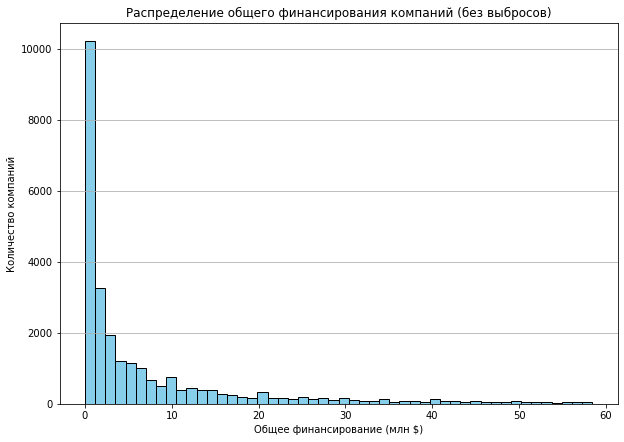

In [42]:
# Настройка графика
plt.figure(figsize=(10, 7))

# Построение гистограммы
plt.hist(filtered_non_zero_95['funding_total_m'], bins=50, color='skyblue', edgecolor='black')

# Настраиваем оформление графика
plt.title('Распределение общего финансирования компаний (без выбросов)')
plt.xlabel('Общее финансирование (млн $)')
plt.ylabel('Количество компаний')
plt.xticks(rotation=0)

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

- Строим диаграмму размаха после удаления выбросов

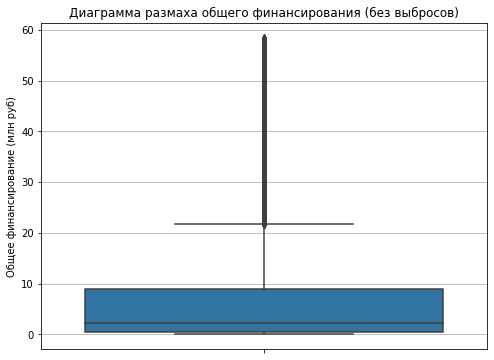

In [43]:
# Настройка графика
plt.figure(figsize=(8, 6))

# Строим диаграмму размаха значений
sns.boxplot(y=filtered_non_zero_95['funding_total_m'])

# Добавляем заголовок и метки оси
plt.title('Диаграмма размаха общего финансирования (без выбросов)')
plt.ylabel('Общее финансирование (млн руб)')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

На основе анализа данных видно, что типичный размер финансирования для одной компании составляет от 0.5 до 9 млн долларов. Медианное значение (2.2 млн долларов) является более устойчивым показателем, чем среднее, так как на него не влияют выбросы. Распределение финансирования скошено вправо, что указывает на наличие компаний с более высоким финансированием, но их количество невелико. Значения выше 9 млн долларов можно считать выбивающимися, а максимальное значение после удаления выбросов (58.43 млн долларов) является экстремальным, но таких компаний очень мало.

### 3.3. Куплены забесплатно?

- Найдем компании, проданные за 0 или 1 доллар

In [44]:
# Фильтруем компании с ненулевым финансированием
non_zero_funding = filtered_companies[filtered_companies['funding_total'] > 0]

In [45]:
# Выводим информацию о результирующем датасете
print("Количество компаний с ненулевым финансированием:", len(non_zero_funding))
display(non_zero_funding.head())

Количество компаний с ненулевым финансированием: 27874


,company_id_round,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,funding_total_m
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT,39.7500
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10,5.0000
19,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,68.0692
20,100155.0,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.0,3.0,10125300.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,10.1253
24,10018.0,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0.0,3.0,33000000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT,33.0000


- Теперь найдем компании, которые были проданы за 0 или 1 доллар, при этом у них был ненулевой общий объем финансирования:

In [46]:
# Находим компании, проданные за 0 или 1 доллар
zero_one_sales = non_zero_funding[
    (non_zero_funding['price_amount'] == 0) | 
    (non_zero_funding['price_amount'] == 1)
     & (non_zero_funding['acquired_company_id'].notnull())
]

# Выводим результат
print("Компании, проданные за 0 или 1 доллар, с привлечённым финансированием:")
display(zero_one_sales[['acquired_company_id', 'price_amount', 'funding_total']])
print("Количество компаний, проданных за 0 или 1 доллар:", len(zero_one_sales))

Компании, проданные за 0 или 1 доллар, с привлечённым финансированием:


,acquired_company_id,price_amount,funding_total
66,10054.0,0.0,121500000.0
170,101312.0,0.0,4000000.0
177,101340.0,0.0,250000.0
181,10137.0,0.0,1310000.0
184,10139.0,0.0,44925000.0
...,...,...,...
196361,9871.0,0.0,1500000.0
196402,99.0,0.0,3900000.0
196411,9905.0,0.0,5172350.0
196430,992.0,0.0,10000000.0


Количество компаний, проданных за 0 или 1 доллар: 1584


- Теперь рассчитаем границы выбросов для столбца `funding_total` с использованием метода IQR (межквартильного размаха):

In [47]:
# Рассчитываем квартили и межквартильный размах
Q1 = zero_one_sales['funding_total'].quantile(0.25)
Q3 = zero_one_sales['funding_total'].quantile(0.75)
IQR = Q3 - Q1

In [48]:
# Определяем границы выбросов
lower_bound = max(0, Q1 - 1.5 * IQR)  # Нижняя граница не может быть отрицательной
upper_bound = Q3 + 1.5 * IQR         # Верхняя граница

# Выводим результаты
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

Нижняя граница выбросов: 0.00
Верхняя граница выбросов: 35500000.00


- Теперь определим, каким процентилям соответствуют границы выбросов:

In [49]:
# Определяем границы выбросов
lower_percentile = (zero_one_sales['funding_total'] <= lower_bound).mean() * 100
upper_percentile = (zero_one_sales['funding_total'] >= upper_bound).mean() * 100

# Выводим результаты
print(f"Нижняя граница: {lower_percentile:.2f}%")
print(f"Верхняя граница: {upper_percentile:.2f}%")

Нижняя граница: 0.00%
Верхняя граница: 8.84%


В датасете выявлено 1584 компании, проданные за 0 или 1 доллар, несмотря на наличие привлеченного финансирования. Это может свидетельствовать о различных сценариях: банкротство, стратегическая продажа активов или неточности в данных.

При анализе выбросов по объему финансирования методом IQR установлены границы:
Нижняя: 0.00 (0.00% данных)
Верхняя: 35500000.00 (8.84% данных)

Полученные результаты требуют дополнительной проверки контекста сделок и качества данных. Выявленные аномалии могут указывать как на реальные проблемные случаи, так и на ошибки при сборе информации. Рекомендуется провести более детальный анализ отдельных кейсов для понимания причин столь низкой цены продажи.

### 3.4. Цены стартапов по категориям

- Выбираем только необходимые столбцы и удаляем строки с пропущенными значениями.

In [50]:
# Оставляем только нужные столбцы
filtered_data = filtered_companies[['category_code', 'price_amount']]

# Убираем пропущенные значения
filtered_data = filtered_data.dropna()

- Группируем данные по категориям и рассчитываем медиану, стандартное отклонение и количество сделок.

In [51]:
# Группируем по категориям и рассчитываем статистики
category_analysis = filtered_data.groupby('category_code')['price_amount'].agg(
    median_price='median',
    std_price='std',
    count='count'
).reset_index()

In [52]:
# Фильтруем категории с малым количеством сделок (менее 5)
category_analysis = category_analysis[category_analysis['count'] >= 5]

- Находим топ-5 категорий по медианной цене и по разбросу цен.

In [53]:
# Выделяем категории с самыми высокими медианными ценами
top_median_categories = category_analysis.nlargest(5, 'median_price')

# Выделяем категории с наибольшей изменчивостью цен
top_std_categories = category_analysis.sort_values(by='std_price', ascending=False).head(5)

# Отображение результатов анализа
print("Топ-5 с наиболее высокими медианными ценами:")
print(top_median_categories[['category_code', 'median_price', 'count']])

print("\nТоп-5 с наибольшим разбросом цен:")
print(top_std_categories[['category_code', 'std_price', 'count']])


Топ-5 с наиболее высокими медианными ценами:
    category_code  median_price  count
18  manufacturing    72000000.0     29
30    real_estate    50000000.0      7
2      automotive    43000000.0      5
3         biotech    13200000.0    452
15    hospitality    12500000.0     11

Топ-5 с наибольшим разбросом цен:
       category_code     std_price  count
29  public_relations  4.115078e+09    213
30       real_estate  2.505123e+09      7
2         automotive  2.297758e+09      5
3            biotech  1.543619e+09    452
14            health  1.249084e+09     27


Топ-5 категорий выбран для фокусировки на ключевых направлениях без перегрузки анализа, что позволяет выделить наиболее значимые тенденции.

**1. Категории с высокими ценами**:
Категории с самыми высокими медианными ценами (например, `manufacturing`, `real_estate`, `automotive`) привлекательны для инвесторов, готовых инвестировать в крупные проекты с высокой стоимостью поглощения.

**2. Категории с большим разбросом цен**:
Наибольший разброс цен наблюдается в категориях `public_relations`, `real_estate` и `automotive`. Высокая изменчивость указывает на повышенный риск, но также на потенциал для высокой доходности.

**3. Категории для рискованных инвестиций**:
Особый интерес представляют категории, входящие в оба списка (`real_estate`, `automotive`, `biotech`). Они сочетают высокие цены и значительную волатильность, что делает их привлекательными для инвесторов, готовых к риску.

**4. Оценка рисков:**
Высокое стандартное отклонение (например, в `public_relations`) сигнализирует о неопределенности и повышенном риске. Однако такие категории могут быть интересны тем, кто ориентирован на высокую доходность.

Топ-5 категорий помогает сфокусироваться на ключевых направлениях для инвестиций, учитывая как типичные цены, так и уровень риска. Категории, входящие в оба списка, наиболее перспективны для рискованных, но потенциально высокоэффективных вложений.

### 3.5. Сколько раундов продержится стартап перед покупкой

In [54]:
# Исследуем столбец funding_rounds
print(filtered_companies['funding_rounds'].describe())

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64


In [55]:
# Выбираем нужные данные
rounds_data = filtered_companies[['status', 'funding_rounds']].dropna()

# Группируем по статусу и считаем среднее количество раундов
avg_rounds_by_status = rounds_data.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

# Выводим результаты
print("Среднее количество раундов по статусам:")
print(avg_rounds_by_status)

Среднее количество раундов по статусам:
status
ipo          1.934375
operating    1.522658
closed       1.381453
acquired     0.523526
Name: funding_rounds, dtype: float64


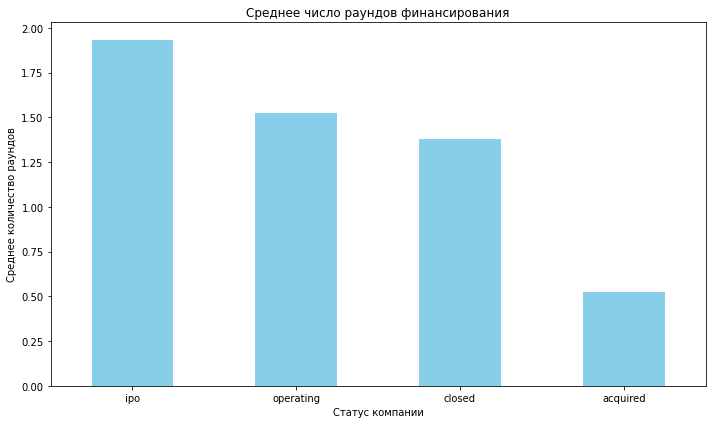

In [56]:
### Настройка графика
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму с помощью plot
avg_rounds_by_status.plot(kind='bar', color='skyblue')

# Настраиваем оформление графика
plt.title('Среднее число раундов финансирования')
plt.xlabel('Статус компании')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=0)
plt.tight_layout()

# Выводим график
plt.show()

На графике видно, что среднее количество раундов финансирования варьируется в зависимости от статуса компании:

Стартапы со статусом `ipo` имеют самое большое среднее количество раундов финансирования — 1,93. Это связано с тем, что компании, выходящие на биржу, обычно проходят несколько этапов финансирования для достижения необходимого уровня развития.

Стартапы со статусом `operating` проходят в среднем 1,52 раунда, что указывает на их активное развитие и привлечение инвестиций.

Стартапы со статусом `closed` имеют среднее количество раундов 1,38, что может быть связано с их неудачей или недостатком финансирования.

Стартапы со статусом `acquired` имеют самое маленькое среднее количество раундов — 0,52. Это объясняется тем, что такие компании часто продаются на ранних стадиях, не успевая пройти много раундов финансирования.

Таким образом, количество раундов финансирования напрямую связано с текущим статусом компании и её жизненным циклом.

## Шаг 4. Итоговый вывод и рекомендации

- **Предобработка данных**:

Пропуски обнаружены практически во всех датасетах, особенно в столбцах `category_code`, `founded_at`, `closed_at`, `network_username` и других. Приняли решение не заполнять пропуски , так как это могло бы исказить анализ.

Названия столбцов приведены к единому стилю (snake_case), типы данных исправлены (например, даты преобразованы в `datetime`).

Датасет `company_and_rounds.csv` разделен на две части: информация о компаниях и раундах финансирования.

- **Анализ раундов финансирования**:

Максимальный типичный размер финансирования был в 2005 году (5.5 млн долларов), затем наблюдалось снижение среднего размера финансирования до 1.2 млн долларов к 2013 году при росте числа раундов.

Медианное значение финансирования составило 2.2 млн долларов, что является более устойчивым показателем по сравнению со средним из-за выбросов.

- **Сотрудники и их образование**:

В крупных компаниях доля сотрудников без информации об образовании ниже (19.8%), чем в малых и средних (36–37%).
Таблица degrees.csv не добавляет новой информации, так как количество уникальных сотрудников совпадает с данными из `education.csv`.

- **Выбросы и цены на стартапы**:

Использованы процентили для определения границ выбросов. Медианное значение финансирования (2.2 млн долларов) лучше отражает типичные значения.

Выявлены компании, проданные за 0 или 1 доллар, несмотря на ненулевое финансирование.

- **Топ-5 категорий с наибольшими типичными ценами**: `manufacturing`, `real_estate`, `automotive`. 


- **Категории с высоким разбросом цен**: `public_relations`, `real_estate`, `automotive`.


- **Количество раундов финансирования**: Стартапы со статусом IPO проходят больше раундов финансирования (1.93), а приобретенные компании — меньше (0.52).

**Рекомендации:**

Для инвесторов, ориентированных на высокий доход: стоит обратить внимание на категории с высоким разбросом цен, такие как `real_estate` и `automotive`. Эти категории сочетают высокие типичные цены и значительную волатильность, что делает их потенциально высокодоходными, но рискованными.

Для инвесторов, предпочитающих стабильность: рекомендуется рассматривать категории с высокими медианными ценами, такие как `manufacturing` и `biotech`, где риски ниже, но доходность может быть более предсказуемой.

Для стартапов, планирующих выход на `IPO`: важно учитывать, что такие компании проходят больше раундов финансирования, что требует долгосрочных инвестиций и стратегического планирования.

Анализ показал, что данные о стартапах имеют значительные пропуски и выбросы, что требует осторожности при интерпретации результатов. Однако выделенные тенденции и категории могут быть полезны для принятия решений об инвестициях. Рекомендуется дополнительно изучить контекст сделок и проверить качество данных для более точного анализа.